In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv('diamonds.csv')
data.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [3]:
points = np.array(data[['carat','depth']][1:5000], dtype=float)

# Main part

In [4]:
def initialize_centroids(points, k):
    '''
        Selects k random points as initial
        points from dataset
    '''
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [5]:
def MSE(centroids, current_centroids):
    MSE = np.absolute( ((centroids - current_centroids)**2 ).sum() )
    return MSE / centroids.shape[0]

In [6]:
def closest_centroid(points, centroids):
    '''
        Returns an array containing the index to the nearest centroid for each point
    '''
    
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [7]:
def move_centroids(points, closest, centroids):
    '''
        Returns the new centroids assigned from the points closest to them
    '''
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [8]:
def k_means(points, k, num_iterations=1000, error = 0.1):
    # вибараємо k випадкови точок і робимо їх центроїдами для першої ітерації
    centroids = initialize_centroids(points, k)
    current_centroids = np.empty((k,len(points[0])))
    
    # виконуємо пошук нових центроїдів для кожного кластеру
    # поки різниця координат поточної точки і минулої не буде менше заданого порогу
    # або кількість ітерацій буде більша заданої
    
    for i in range(num_iterations):
        
        current_centroids = initialize_centroids(points,k)
        
        closest = closest_centroid(points, centroids)
        centroids = move_centroids(points, closest, centroids)

        # якщо помилка менша за порогову, то виходимо іх циклу
        if( MSE(centroids,current_centroids) < error):
            break
            
    return centroids
        
        

In [9]:
centroids = k_means(points,4)
print(centroids)

[[  0.73448543  60.95942891]
 [  0.74910098  62.41887516]
 [  0.89160878  64.7023766 ]
 [  0.81974057  58.6134434 ]]


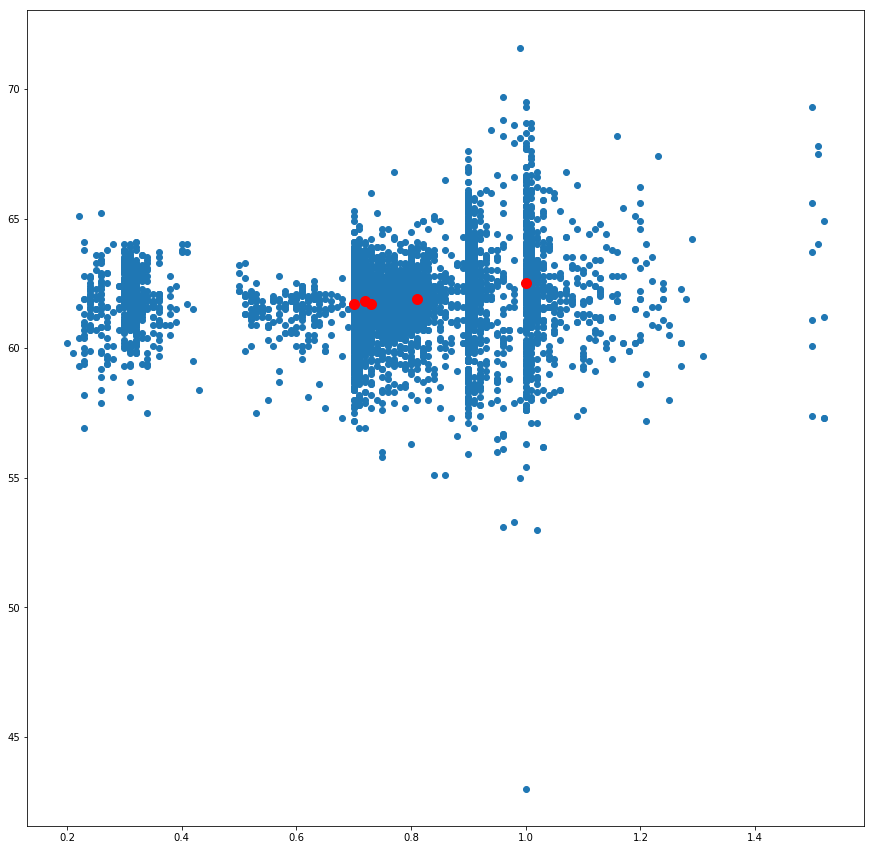

In [10]:
centroids = initialize_centroids(points, 5)

plt.figure(figsize=(15,15))
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
ax = plt.gca()
plt.show()

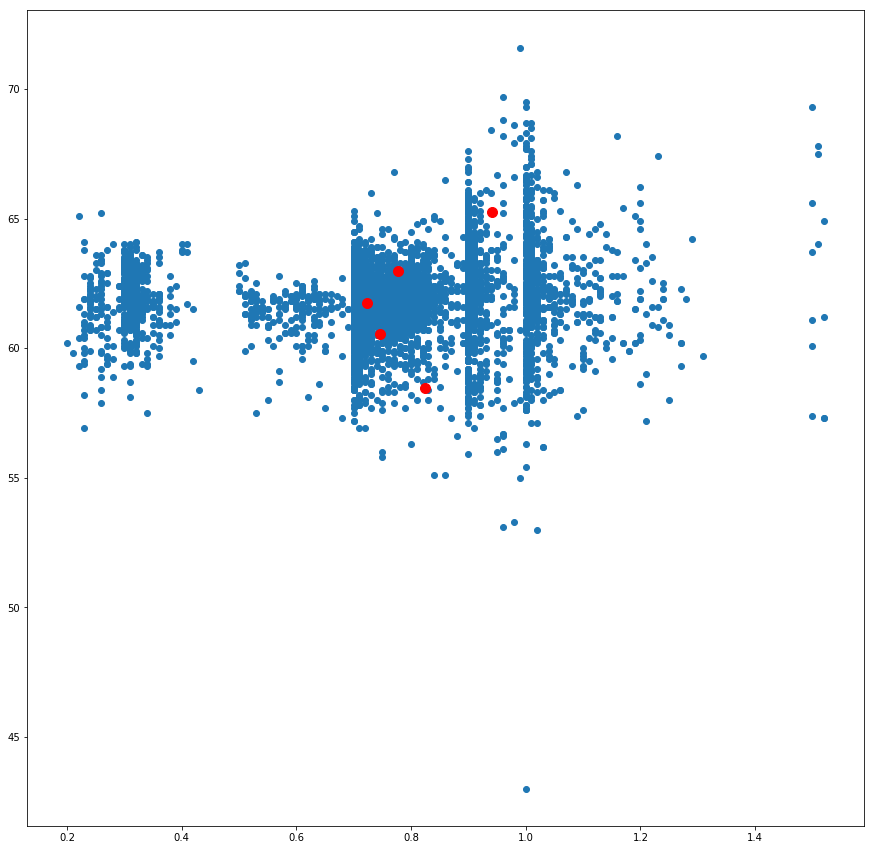

In [19]:
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)

plt.figure(figsize=(15,15))
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
ax = plt.gca()
plt.show()

як бачимо k-means при великій розрідженності і в деяких місцях великою густиною  даних видає результати, 
які візуально здаються некоректними


# Порівнянння із sklearn

In [24]:
from sklearn.cluster import KMeans

In [29]:
X = np.array(data[['carat','depth']][1:5000], dtype=float)

kmeans = KMeans(n_clusters=5, random_state=0)
kms = kmeans.fit(X)
print(kms.cluster_centers_ )

[[  0.74768939  60.47935606]
 [  0.78765281  63.2608802 ]
 [  0.73445249  61.85665158]
 [  0.96535     65.985     ]
 [  0.83617647  58.25718954]]


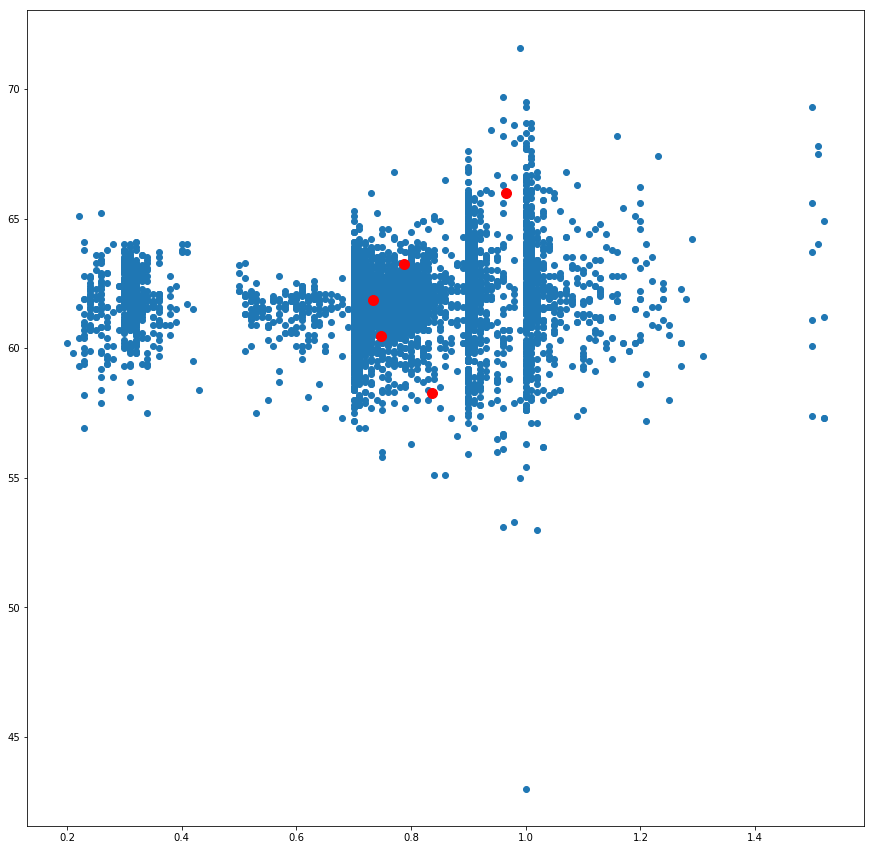

In [30]:
centr = kms.cluster_centers_

plt.figure(figsize=(15,15))
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centr[:, 0], centr[:, 1], c='r', s=100)
ax = plt.gca()
plt.show()